# Introduction to Deep Learning in Python

Deep learning is the machine learning technique behind the most exciting capabilities in diverse areas like robotics, natural language processing, image recognition, and artificial intelligence, including the famous AlphaGo. In this course, you'll gain hands-on, practical knowledge of how to use deep learning with Keras 2.0, the latest version of a cutting-edge library for deep learning in Python.

**Instructor:** Dan Becker, contributor to Keras and TensorFlow libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_image(image, title='img', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [78]:
def plot_comparison(original, original_title, filtered, title_filtered):    
    fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize=(12, 8), sharex= True, sharey= True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title(original_title)
    ax1.axis('off')
    ax2.imshow(filtered, cmap= plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

In [89]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return error

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return slope

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors ** 2)
    return mse

In [90]:
#def relu(input):
    #'''Define your relu activatino function here'''
    ## Calculate the value for the output of the relu function: output
    #output = max(0, input)
    
    ## Return the value just calculate
    #return output

# $\star$ Chapter 1: Basics of deep learning and neural networks
In this chapter, you'll become familiar with the fundamental concepts and terminology used in deep learning, and understand why deep learning techniques are so powerful today. You'll build simple neural networks and generate predictions with them.

#### 
* Linear regression does not account for interactions
* Neural networks account for interactions really well
* Deep learning uses especially powerful neural networks; their ability to capture extremely complex interactions allows them to do amazing things with:
    * Text
    * Images
    * Videos
    * Audio
    * Source code
    * Almost anything else

## Forward Propagation
* Below we use forward propagation to feed the input values through the neural network and obtain an output value of **`9`**:

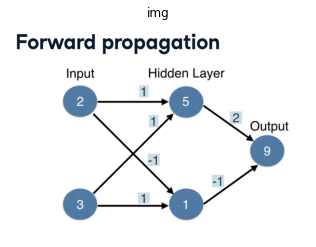

In [3]:
show_image(plt.imread('data/forward_prop.png'))

* Forward propagation: we moved from the input, on the left, to the output, on the right. 
* Multiply-add process
* Dot product
* Forward propagation for one data point at a time
* Output is the prediction for that data point

#### Forward Propagation Code

```
import numpy as np
input_data = np.array([2,3])
weights = {'node_0': np.array([1, 1]),
          'node_1': np.array([-1, 1]),
          'output': np.array([2, -1])}
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

hidden_layer_values = np.array([node_0_value, node_1_value])

output = (hidden_layer_values * weights['output']).sum()
```

In [4]:
input_data = np.array([2,3])
weights = {'node_0': np.array([1, 1]),
          'node_1': np.array([-1, 1]),
          'output': np.array([2, -1])}
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

In [5]:
hidden_layer_values = np.array([node_0_value, node_1_value])
print(hidden_layer_values)

[5 1]


In [6]:
output = (hidden_layer_values * weights['output']).sum()
print(output)

9


We can check to confirm that each of these array values match those values calculated in the diagram above. 

#### Exercises: Coding the forward propagation algorithm
In this exercise, you'll write code to do forward propagation (prediction) to your first neural network

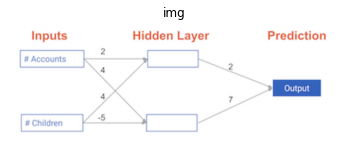

In [7]:
show_image(plt.imread('data/ex_1.png'))

Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course.

The input data has been pre-loaded as `input_data`, and the weights are available in a dictionary called `weights`. The array of weights for the first node in the hidden layer are in `weights['node_0']`, and the array of weights for the second node in the hidden layer are in `weights['node_1']`.

The weights feeding into the output node are available in `weights['output']`.

```
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)
```

In [8]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

9


### Activation functions
* **Identity function:** an activation function that returns the input

#### ReLU function
* Creating this multiply-add process is only half the story for hidden layers
* For neural networks to achieve their maximum predictive power, we must apply something called an **activation function** in the hidden layers
* An **activation function** allows the model to capture non-linearities
* Non-linearities capture patterns like how going from no children to one child may impact your banking transactions differently than going from three children to four.
* If the relationships in the data aren't straight-line relationships, we will need an activation function that captures non-linearities
* Activation functions are applied to node inputs to produce node output
* For a long time **tanh** was the standard activation function, but today **the standard in both industry and research applications is the ReLU or Rectified Linear Activation Function.**

$ReLU(x)$ =
    \begin{cases}
        0 \text{  if x}<0\\
        1 \text{  if x}>= 0\\
    \end{cases}  

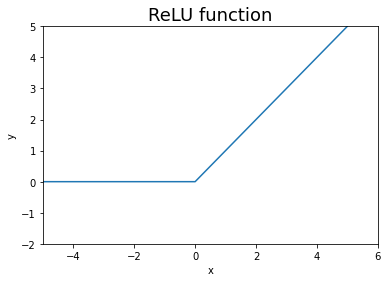

In [63]:
# Plot ReLU function
x=np.arange(-5,6)
y =[]
for i in range(len(x)):
    y.append(max(0,x[i]))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,5])
plt.xlim(-5, 6)
plt.title('ReLU function', fontsize=18)
plt.show()

[Setting xlim, ylim](https://stackabuse.com/how-to-set-axis-range-xlim-ylim-in-matplotlib/)

* Though **ReLU** has two linear pieces, it is **surprisingly powerful when composed together through multiple successive hidden layers.**

#### Tanh functions

In [74]:
x = np.arange(-5.75,6, 0.25)

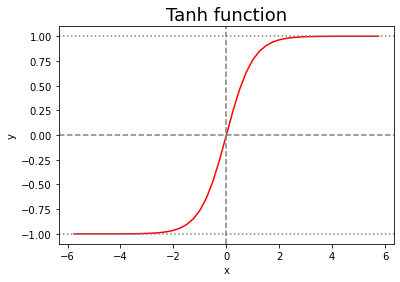

In [76]:
plt.plot(x, np.tanh(x), c='red')
plt.title('Tanh function', fontsize=18)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, c='gray', linestyle='--')
plt.axvline(x=0, c='gray', linestyle='--')
plt.axhline(y=-1, c='gray', linestyle='dotted')
plt.axhline(y=1, c='gray', linestyle='dotted')
plt.show()

[Matplotlib linestyle](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)

```
import numpy as np
input_data = np.array([2,3])
weights = 'node_0': np.array([1, 1]),
          'node_1': np.array([-1, 1]),
          'output': np.array([2, -1])}
node_0_value = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)
node_1_value = (input_data * weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)
hidden_layer_values = np.array([node_0_value, node_1_value])
hidden_layer_outputs = np.array(node_0_output, node_1_output])
output = (hidden_layer_values * weights['output']).sum()
```

In [68]:
input_data = np.array([2,3])
weights = {'node_0': np.array([1, 1]),
          'node_1': np.array([-1, 1]),
          'output': np.array([2, -1])}
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)
hidden_layer_values = np.array([node_0_value, node_1_value])
hidden_layer_output = np.array([node_0_output, node_1_output])
output = (hidden_layer_output * weights['output']).sum()
print(output)

1.2382242525694254


* The above code is the same code we saw earlier, only we've distinguished the input from the output in each node and we've applied the tanh function to convert the input to the output, giving us a prediction of about **1.2 transactions**.

In [69]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

9


#### Applying the network to many observations/rows of data
You'll now define a function called `predict_with_network()` which will generate predictions for multiple data observations, which are pre-loaded as `input_data`. As before, `weights` are also pre-loaded. In addition, the `relu()` function you defined in the previous exercise has been pre-loaded.

```
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)
```

### Deeper Networks
* The difference between modern deep learning and the historical neural networks that didn't deliver these amazing results, is the use of models with not just one hidden layer, but with many successive hidden layers
* We forward propagate through these successive layers in a similar way to what we saw for a single hidden layer

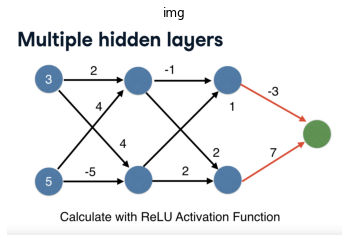

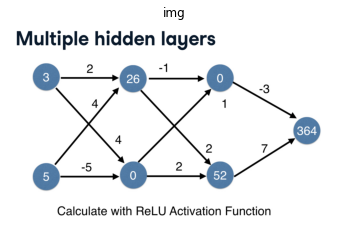

In [71]:
show_image(plt.imread('data/multiple_hidden_layers.png'))
show_image(plt.imread('data/multiple_hidden_layers2.png'))

* This can scale quite naturally to even a thousand layers or more.
* Note the use of the ReLU function in the lower diagram; any outputs that would have been negative become zero (as per the ReLU definition).


* You use the same forward propagation process, but apply the iterative process more times.

### Representation learning
* Deep networks internally build representations of patterns in the data, making them useful for prediction
* They find increasingly complex patterns as we go through successive hidden layers of the network
* In this way, neural networks partially replace the need for feature engineering or manually creating better predictive features
* Deep learning is also sometimes called representation learning, because subsequent layers build increasingly sophisticatd representations of the raw data, until we get to a stage where we can make predictions
* The "cool" thing about deep learning is that the modeler doesn't need to specify the interactions; we never tell the model to look for diagonal lines, for example
* Instead, when you train the model, the neural network gets weights that find the relevant patterns to make better predictions

```
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    
    # Calculate output here: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)
```

# $\star$ Chapter 2: Optimizing a neural network with backward propagation
Learn how to optimize the predictions generated by your neural networks. You'll use a method called backward propagation, which is one of the most important techniques in deep learning. Understanding how it works will give you a strong foundation to build on in the second half of the course.

### The need for optimization

* The mere fact that a model has the structure of a neural network does not guarantee that it will make good predictions

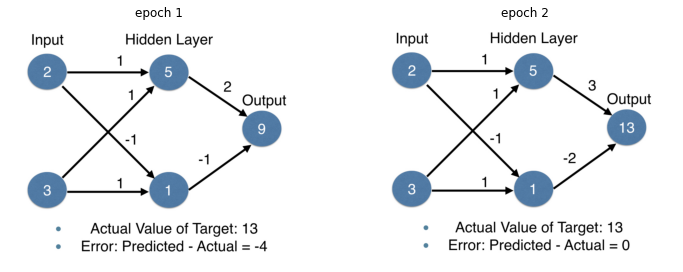

In [79]:
plot_comparison(plt.imread('data/1.png'), "epoch 1", plt.imread('data/2.png'), "epoch 2")

* Above, not how the change in weights improved the model for this particular data point (which we now know is `13`).


#### Predictions with multiple points
* Making accurate predictions gets harder with multiple points.
* At any set of weights, there are many values of the error
* ...corresponding to the many points we make predicitons for 

#### Loss function
* Aggregates error in predictions from many data points into a single number
* Measure of a model's predictive performance
* For example, a common loss function for a regression task is MSE

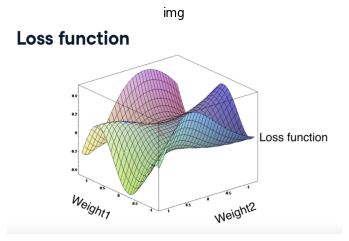

In [80]:
show_image(plt.imread('data/loss_func_weights.png'))

* Consider a model with only two weights, illustrated above.
* Lower loss function values mean a better model
* Goal: Find the weights that give the lowest value for the loss function
* We do this with gradient descent

#### Gradient descent steps
* Start at random point
* Until you are somewhere flat:
    * Find the slope
    * Take a step downhill

```
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [-1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = target_actual - model_output_1

# Print error_0 and error_1
print(error_0)
print(error_1)
```

#### Exercises: Scaling up to multiple data points
You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as `weights_0` and `weights_1`.

`input_data` is a list of arrays. Each item in that list contains the data to make a single prediction. `target_actuals` is a list of numbers. Each item in that list is the actual value we are trying to predict.

In this exercise, you'll use the `mean_squared_error()` function from `sklearn.metrics`. It takes the true values and the predicted values as arguments.

You'll also use the preloaded `predict_with_network()` function, which takes an array of data as the first argument, and weights as the second argument.

```
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)
```

### Gradient Descent
* If the slope is positive:
    * Going oppposite the slope means moving to lower numbers
    * Subtract the slope from the current value
    * Too big a step might lead us astray
* Solution: **learning rate**
    * Update each weight by subtracting `learning rate * slope`
    * Learning rates are frequently around `0.01`
    * This ensures we take small steps, so we reliably move towards the optimal weights
    
#### Code to calculate slopes and update weightsdc

```
import numpy as np
weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
error = preds - target
print(error)

gradient = 2 * input_data * error
gradient

weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)
```

In [84]:
weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
error = preds - target
print(error)

5


In [85]:
gradient = 2 * input_data * error
gradient

array([30, 40])

In [86]:
weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)

2.5


#### Exercises: Calculating slopes
You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is `2 * x * (xb-y)`, or `2 * input_data * error`. Note that `x` and `b` may have multiple numbers (`x` is a vector for each data point, and `b` is a vector). In this case, the output will also be a vector, which is exactly what you want.

You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called `weights` as well as data for a single point called `input_data`. The actual value of the target you want to predict is stored in `target`.

```
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)
```

In [87]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)

[30 40]


```
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights-(learning_rate * slope)

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated -target

# Print the original error
print(error)

# Print the updated error
print(error_updated)
```

In [88]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights-(learning_rate * slope)

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated -target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

5
2.5


```
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return error

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return slope

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors ** 2)
    return mse
```

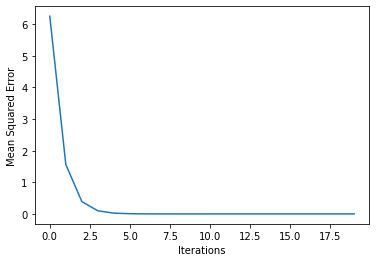

In [91]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Backpropagation
* Just as forward propagation sends input data through the hidden layers and into the output later, **backpropagation** takes the error from the output layer and propagates it backward through the hidden layers, towards the input layer.

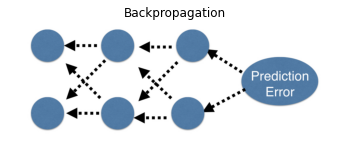

In [92]:
show_image(plt.imread('data/backprop.png'), "Backpropagation")

* Allows gradient descent to update all weights in neural network (by getting gradients for all weights)
* Comes from chain rule of calculus
* Important to understand the process, but you will generally use a library that implements this

#### Backpropagation process
* Trying to estimate the slope of the loss function w.r.t each weight.
* Do forward propagation to calculate predictions and errors (*before* we do backpropagation).
* Go back one layer at a time
* Gradients for weight is product of:
    * Node value feeding into that weight
    * Slope of loss function w.r.t node it feeds into
    * Slope of activation function at the node it feeds into
* Need to also keep track of the slopes of the loss function w.r.t node values
* Slope of node values are the sum of the slopes for all weights that come out of them

#### Stochastic gradient descent
* It is common to calculate slopes on only a subset of the data ( a **batch**)
* Use a different batch of data to calculate the next update
* Start over from the beginning once all data is used
* Each time through the training data is called an **epoch**
* When slopes are calculated on one batch at a time: **stochastic gradient descent**